In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la

import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig
# import basic plot tools
from qiskit.basicplotter import plot_histogram

In [2]:
# import state tomography functions
from tools.tomography import plot_state, build_tomo_circuits, build_tomo_keys, state_tomography, state_fidelity

### Bell States on the ibmqx2

In [3]:
qp = QuantumProgram()
qp.set_api(Qconfig.APItoken, Qconfig.config["url"], verify=False) # set the APIToken and API url

-- Ignoring SSL errors.  This is not recommended --


True

In [4]:
qp.available_backends()

['ibmqx2',
 'ibmqx3',
 'ibmqx_qasm_simulator',
 'local_qasm_simulator',
 'local_unitary_simulator']

In [5]:
conf = qp.get_backend_configuration("ibmqx2")
conf

{'chipName': 'sparrow',
 'couplingMap': [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]],
 'description': 'Device Real5Qv2',
 'id': '28147a578bdc88ec8087af46ede526e1',
 'nQubits': 5,
 'name': 'ibmqx2',
 'onlineDate': '2017-06-15T11:00:00.000Z',
 'serialNumber': 'Real5Qv2',
 'simulator': False,
 'status': 'on',
 'topologyId': '250e969c6b9e68aa2a045ffbceb3ac33',
 'url': 'https://github.com/IBM/qiskit-qx-info/tree/master/backends/ibmqx2'}

In [6]:
backend = conf['name']
shots = 1000
max_credits = 5
n = conf['nQubits']

>> quantum_registers created: q 5
>> classical_registers created: c 5
running on backend: ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)
status = RUNNING (30 seconds)
status = RUNNING (40 seconds)
status = RUNNING (50 seconds)
status = RUNNING (60 seconds)
status = RUNNING (70 seconds)
status = RUNNING (80 seconds)
status = RUNNING (90 seconds)
status = RUNNING (100 seconds)
status = RUNNING (110 seconds)
status = RUNNING (120 seconds)
{'status': 'COMPLETED', 'result': 'all done'}


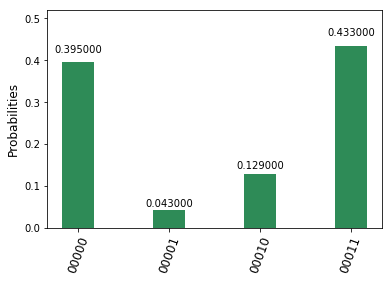

In [7]:
#Setup the experiment run one circuit 

q = qp.create_quantum_registers("q", n)
c = qp.create_classical_registers("c", n)
bell = qp.create_circuit("bell", ["q"], ["c"])
bell.h(q[0])
bell.cx(q[0], q[1])
bell.measure(q[0], c[0])
bell.measure(q[1], c[1])

circuits = ["bell"]
out = qp.execute(circuits, backend, shots, max_credits, wait=10, timeout=240)
print(out)
if out['status'] !='Error':
    plot_histogram(qp.get_counts("bell"))


running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.886848352313


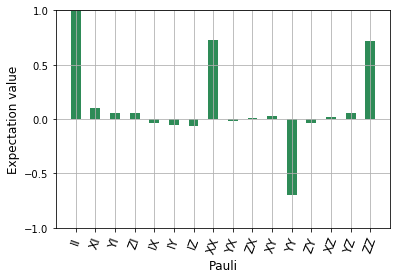

In [8]:
# run tomograph 
bell_tomo = qp.create_circuit("bell_tomo", ["q"], ["c"])
bell_tomo.h(q[0])
bell_tomo.cx(q[0], q[1])

meas_qubits= [0,1]
build_tomo_circuits(qp, "bell_tomo", "q", "c", meas_qubits)
# construct list of tomo circuit labels 
circuits = build_tomo_keys("bell_tomo", meas_qubits)

out = qp.execute(circuits, backend, shots, max_credits, wait=40, timeout=400)
print(out)
if out['status'] !='Error':
    target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
    rho_fit = state_tomography(qp, circuits, shots, n, meas_qubits)
    F_fit = state_fidelity(rho_fit, target)
    print("fid = " +  str(F_fit))
    plot_state(rho_fit,"paulivec")

running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
status = RUNNING (200 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.940744386111 pair [0, 1]


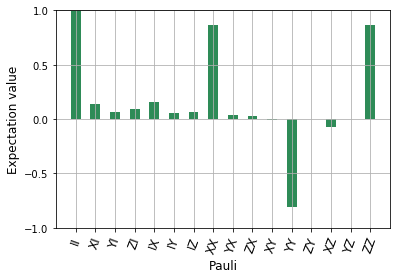

running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
status = RUNNING (200 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.962030747569 pair [0, 2]


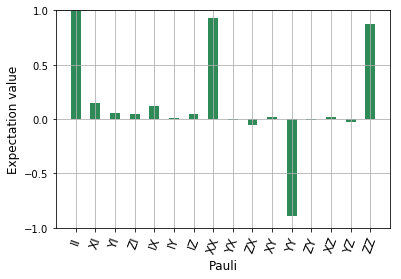

running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
status = RUNNING (200 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.890499346913 pair [1, 2]


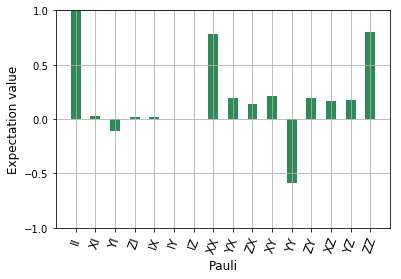

running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
status = RUNNING (200 seconds)
status = RUNNING (240 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.926904529932 pair [3, 2]


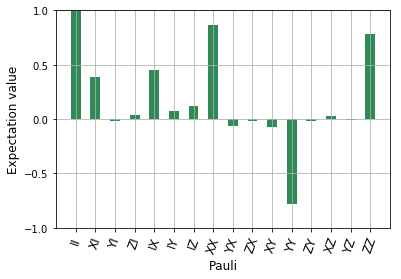

running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
status = RUNNING (200 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.923309265631 pair [3, 4]


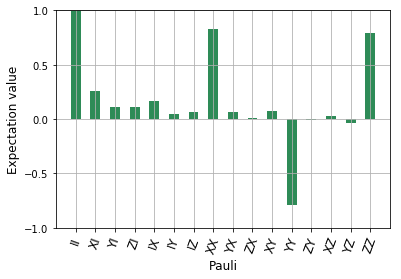

running on backend: ibmqx2
status = RUNNING (40 seconds)
status = RUNNING (80 seconds)
status = RUNNING (120 seconds)
status = RUNNING (160 seconds)
status = RUNNING (200 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.947364766075 pair [4, 2]


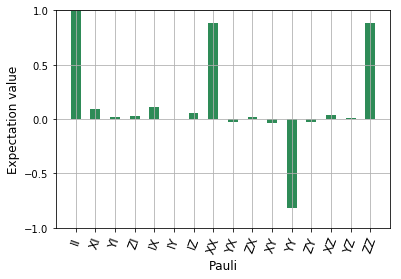

In [9]:
# run all gates 
for i in conf['couplingMap']:
    meas_qubits = i
    
    bell_tomo = qp.create_circuit("bell_tomo", ["q"], ["c"])
    bell_tomo.h(q[i[0]])
    bell_tomo.cx(q[i[0]], q[i[1]])

    build_tomo_circuits(qp, "bell_tomo", "q", "c", meas_qubits)
    # construct list of tomo circuit labels 
    circuits = build_tomo_keys("bell_tomo", meas_qubits)
    
    out = qp.execute(circuits, backend, shots, max_credits, wait=40, timeout=400)
    if out['result'] == 'Time Out':
        print('Timed out, trying again')
        out = qp.execute(circuits, backend, shots, max_credits, wait=40, timeout=400)
    print(out)
    if out['status'] !='Error':
        target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
        rho_fit = state_tomography(qp, circuits, shots, n, meas_qubits)
        F_fit = state_fidelity(rho_fit, target)
        print("fid = " +  str(F_fit)+ " pair " + str(i))
        plot_state(rho_fit,"paulivec")

### Bell States on the ibmqx3

In [10]:
conf = qp.get_backend_configuration("ibmqx3")
conf

{'chipName': 'lark',
 'couplingMap': [[0, 1],
  [1, 2],
  [2, 3],
  [3, 14],
  [4, 3],
  [4, 5],
  [6, 7],
  [6, 11],
  [7, 10],
  [8, 7],
  [9, 8],
  [9, 10],
  [11, 10],
  [12, 5],
  [12, 11],
  [12, 13],
  [13, 4],
  [13, 14],
  [15, 0],
  [15, 14]],
 'description': '16 transmon ladder',
 'id': '2bcc3cdb587d1bef305ac14447b9b0a6',
 'nQubits': 16,
 'name': 'ibmqx3',
 'onlineDate': '2017-06-07T11:00:00.000Z',
 'serialNumber': 'ibmqx3',
 'simulator': False,
 'status': 'on',
 'topologyId': 'db99eef232f426b45d2d147359580bc6',
 'url': 'https://github.com/IBM/qiskit-qx-info/tree/master/backends/ibmqx3',
 'version': '1.0'}

In [11]:
backend = conf['name']
shots = 1000
max_credits = 5
n = conf['nQubits']

>> quantum_registers created: q 16
>> classical_registers created: c 16
running on backend: ibmqx3
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)
{'status': 'COMPLETED', 'result': 'all done'}


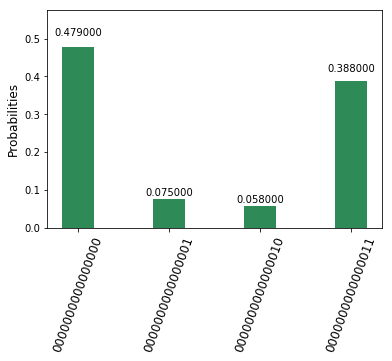

In [12]:
#Setup the experiment run one circuit 

q = qp.create_quantum_registers("q", n)
c = qp.create_classical_registers("c", n)
bell = qp.create_circuit("bell", ["q"], ["c"])
bell.h(q[0])
bell.cx(q[0], q[1])
bell.measure(q[0], c[0])
bell.measure(q[1], c[1])

circuits = ["bell"]
out = qp.execute(circuits, backend, shots, max_credits, wait=10, timeout=240)
print(out)
if out['status'] !='Error':
    plot_histogram(qp.get_counts("bell"))

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.894147638816


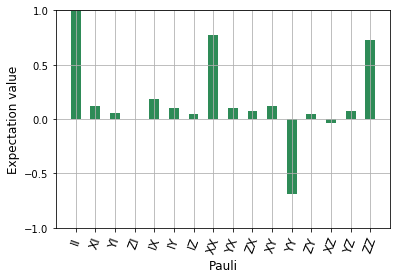

In [13]:
# run tomograph 
bell_tomo = qp.create_circuit("bell_tomo", ["q"], ["c"])
bell_tomo.h(q[0])
bell_tomo.cx(q[0], q[1])

meas_qubits= [0,1]
build_tomo_circuits(qp, "bell_tomo", "q", "c", meas_qubits)
# construct list of tomo circuit labels 
circuits = build_tomo_keys("bell_tomo", meas_qubits)

out = qp.execute(circuits, backend, shots, max_credits, wait=40, timeout=400)
print(out)
if out['status'] !='Error':
    target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
    rho_fit = state_tomography(qp, circuits, shots, n, meas_qubits)
    F_fit = state_fidelity(rho_fit, target)
    print("fid = " +  str(F_fit))
    plot_state(rho_fit,"paulivec")

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.874642784227 pair [0, 1]


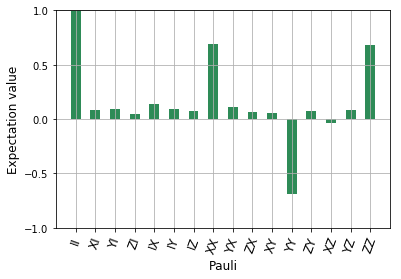

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.916242326025 pair [1, 2]


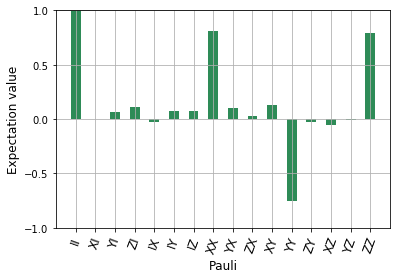

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.896660470858 pair [2, 3]


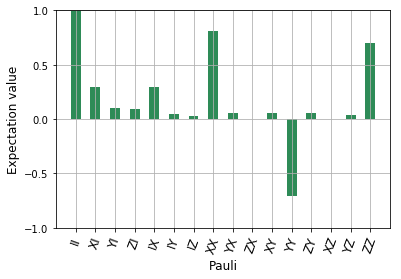

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.866890996608 pair [3, 14]


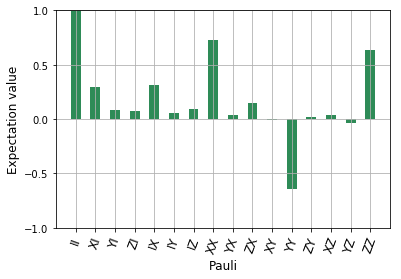

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.859651092013 pair [4, 3]


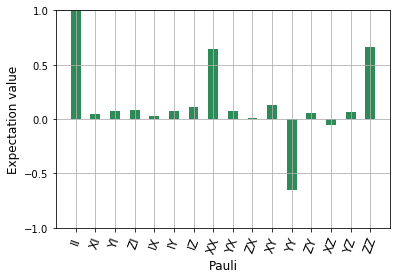

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.879204185613 pair [4, 5]


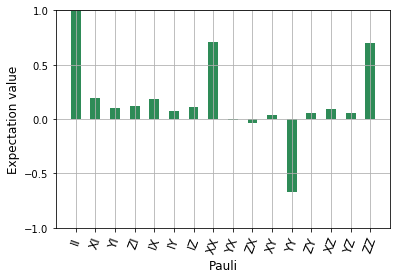

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.889662857492 pair [6, 7]


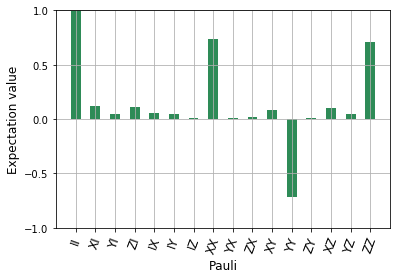

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.913509715329 pair [6, 11]


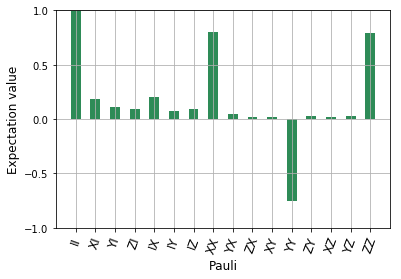

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.838152730712 pair [7, 10]


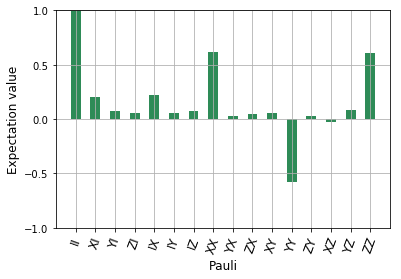

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.818840643837 pair [8, 7]


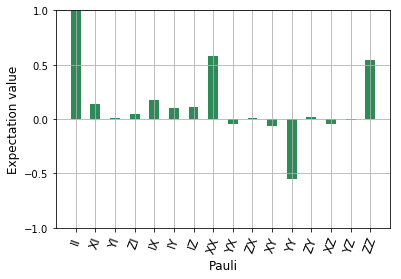

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.764198926982 pair [9, 8]


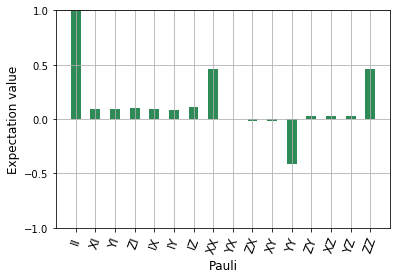

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.77038951187 pair [9, 10]


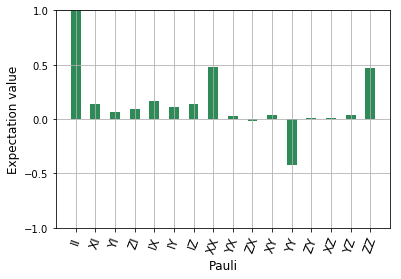

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.882892971996 pair [11, 10]


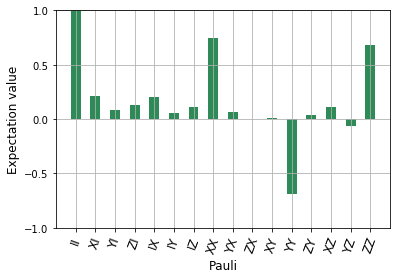

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.883176086633 pair [12, 5]


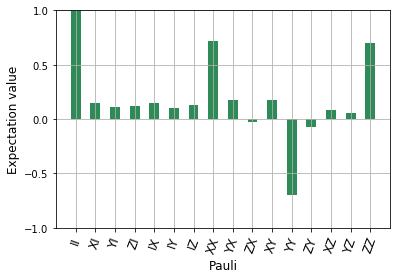

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.88797522488 pair [12, 11]


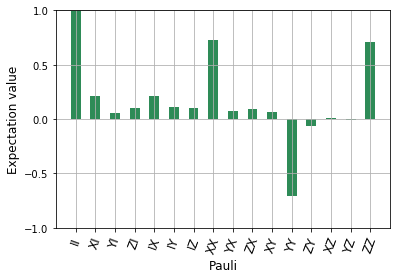

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.776530746333 pair [12, 13]


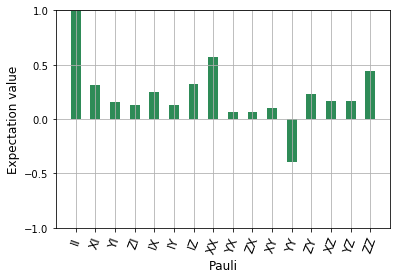

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.812403840464 pair [13, 4]


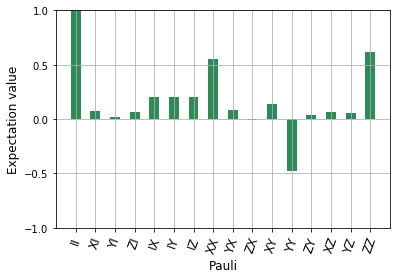

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.813326502704 pair [13, 14]


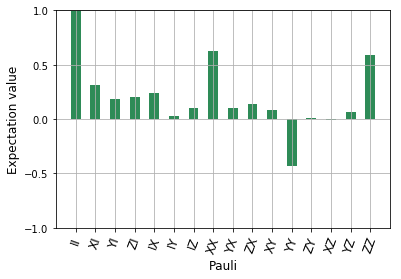

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.882609766545 pair [15, 0]


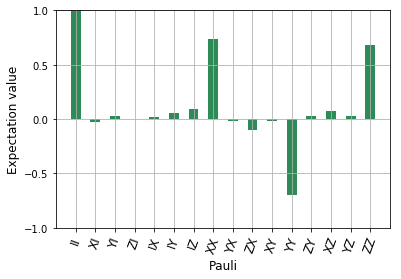

running on backend: ibmqx3
status = RUNNING (40 seconds)
{'status': 'COMPLETED', 'result': 'all done'}
fid = 0.897775027499 pair [15, 14]


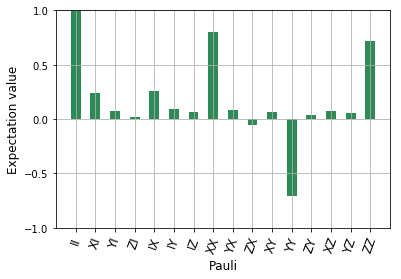

In [14]:
# run all gates 
for i in conf['couplingMap']:
    meas_qubits = i
    
    bell_tomo = qp.create_circuit("bell_tomo", ["q"], ["c"])
    bell_tomo.h(q[i[0]])
    bell_tomo.cx(q[i[0]], q[i[1]])

    build_tomo_circuits(qp, "bell_tomo", "q", "c", meas_qubits)
    # construct list of tomo circuit labels 
    circuits = build_tomo_keys("bell_tomo", meas_qubits)
    
    out = qp.execute(circuits, backend, shots, max_credits, wait=40, timeout=400)
    if out['result'] == 'Time Out':
        print('Timed out, trying again')
        out = qp.execute(circuits, backend, shots, max_credits, wait=40, timeout=400)
    print(out)
    if out['status'] !='Error':
        target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
        rho_fit = state_tomography(qp, circuits, shots, n, meas_qubits)
        F_fit = state_fidelity(rho_fit, target)
        print("fid = " +  str(F_fit)+ " pair " + str(i))
        plot_state(rho_fit,"paulivec")